In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Parse the data
with open("taint_misspub_core.txt") as f:
    data_base_core = f.readlines()
data_base_core = data_base_core[1:]  # Skip the first line
raw_data_base_core = []
for line in data_base_core:
    data_point = line.strip().split(",")
    data_point[2] = int(data_point[2])
    raw_data_base_core.append(data_point)
print(raw_data_base_core)


with open("constant_taint_misspub_core.txt") as f:
    data_const_core = f.readlines()
data_const_core = data_const_core[1:]  # Skip the first line
raw_data_const_core = []
for line in data_const_core:
    data_point = line.strip().split(",")
    data_point[2] = int(data_point[2])
    raw_data_const_core.append(data_point)
print(raw_data_const_core)

with open("taint_misspub_mem.txt") as f:
    data_base_mem = f.readlines()
data_base_mem = data_base_mem[1:]  # Skip the first line
raw_data_base_mem = []
for line in data_base_mem:
    data_point = line.strip().split(",")
    data_point[2] = int(data_point[2])
    raw_data_base_mem.append(data_point)
print(raw_data_base_mem)


with open("constant_taint_misspub_mem.txt") as f:
    data_const_mem = f.readlines()
data_const_mem = data_const_mem[1:]  # Skip the first line
raw_data_const_mem = []
for line in data_const_mem:
    data_point = line.strip().split(",")
    data_point[2] = int(data_point[2])
    raw_data_const_mem.append(data_point)
print(raw_data_const_mem)

[['quadratic', 'baseline', 604], ['primes-between', 'baseline', 985159], ['birthday', 'baseline', 650], ['orders', 'baseline', 286], ['sum-check', 'baseline', 5004], ['palindrome', 'baseline', 370], ['totient', 'baseline', 184], ['relative-primes', 'baseline', 1744], ['hanoi', 'baseline', 0], ['is-decreasing', 'baseline', 22], ['check-primes', 'baseline', 13150], ['sum-sq-diff', 'baseline', 4226], ['fitsinside', 'baseline', 0], ['fact', 'baseline', 1], ['loopfact', 'baseline', 12], ['recfact', 'baseline', 1], ['factors', 'baseline', 27], ['perfect', 'baseline', 157], ['bitshift', 'baseline', 52], ['digital-root', 'baseline', 45], ['up-arrow', 'baseline', 92], ['sum-divisors', 'baseline', 68], ['ackermann', 'baseline', 429800], ['pythagorean_triple', 'baseline', 92385], ['euclid', 'baseline', 895], ['binary-fmt', 'baseline', 0], ['lcm', 'baseline', 0], ['gcd', 'baseline', 5], ['catalan', 'baseline', 710235], ['armstrong', 'baseline', 90], ['pascals-row', 'baseline', 215], ['collatz', 'b

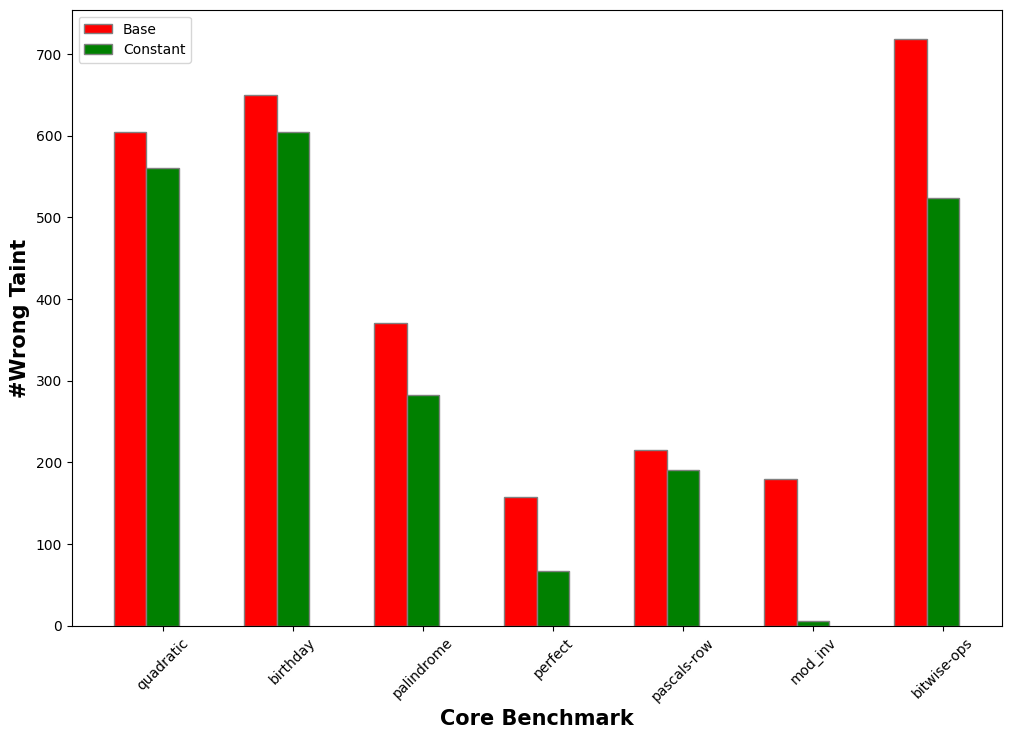

In [15]:
# extract the data
base_core_list = [data_point[2] for data_point in raw_data_base_core]
base_mem_list = [data_point[2] for data_point in raw_data_base_mem]
const_core_list = [data_point[2] for data_point in raw_data_const_core]
const_mem_list = [data_point[2] for data_point in raw_data_const_mem]
core_list = [data_point[0] for data_point in raw_data_base_core]
mem_list = [data_point[0] for data_point in raw_data_base_mem]

# plots
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

# selected benchmark

# Set position of bar on X axis 
br1 = np.arange(7) 
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, base_core_list, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Base') 
plt.bar(br2, const_core_list, color ='g', width = barWidth, 
        edgecolor ='grey', label ='Constant') 

# Adding Xticks 
plt.xlabel('Core Benchmark', fontweight ='bold', fontsize = 15) 
plt.ylabel('#Wrong Taint', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(7)], 
        core_list, rotation=45) 

plt.legend()
plt.show() 


In [21]:
# extract the data
base_core_list = [data_point[2] for data_point in raw_data_base_core]
base_mem_list = [data_point[2] for data_point in raw_data_base_mem]
const_core_list = [data_point[2] for data_point in raw_data_const_core]
const_mem_list = [data_point[2] for data_point in raw_data_const_mem]
print(base_core_list)
# code increases from baseline to tossa
base_to_const_core = [(const_core_list[i] - base_core_list[i]) / base_core_list[i] for i in range(len(base_core_list)) if base_core_list[i] != 0]
print(f"Baseline to OPT #dynamic instruction increase: {np.mean(base_to_const_core)}")
opt_to_const_mem = [(const_mem_list[i] - base_mem_list[i])/base_mem_list[i] for i in range(len(base_mem_list)) if base_mem_list[i] != 0]
print(f"OPT to MEMOPT #dynamic instruction increase: {np.mean(opt_to_const_mem)}")

[604, 985159, 650, 286, 5004, 370, 184, 1744, 0, 22, 13150, 4226, 0, 1, 12, 1, 27, 157, 52, 45, 92, 68, 429800, 92385, 895, 0, 0, 5, 710235, 90, 215, 51, 15, 0, 180, 22, 8030, 718]
Baseline to OPT #dynamic instruction increase: -0.31038052162090457
OPT to MEMOPT #dynamic instruction increase: -0.2175938509342214
